In [ ]:
# !pip install face_recognition

In [ ]:
import face_recognition
from pathlib import Path
from PIL import Image

In [ ]:
# Load the image of the person we want to find similar people for
known_image = face_recognition.load_image_file("test_face7.jpg")

In [ ]:
# Encode the known image
known_image_encoding = face_recognition.face_encodings(known_image)[0]

In [ ]:
# Variables to keep track of the most similar face match we've found
best_face_distance = 1.0
best_face_image = None

In [ ]:
# Loop over all the images we want to check for similar people
for image_path in Path("people").glob("*.jpg"):
    # Load an image to check
    unknown_image = face_recognition.load_image_file(image_path)

    # Get the location of faces and face encodings for the current image
    face_encodings = face_recognition.face_encodings(unknown_image)

    # Get the face distance between the known person and all the faces in this image
    face_distance = face_recognition.face_distance(face_encodings, known_image_encoding)[0]

    # If this face is more similar to our known image than we've seen so far, save it
    if face_distance < best_face_distance:
        # Save the new best face distance
        best_face_distance = face_distance
        # Extract a copy of the actual face image itself so we can display it
        best_face_image = unknown_image

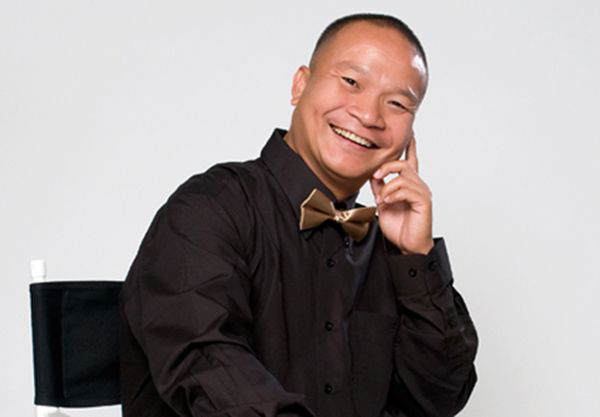

In [ ]:
# Display the face image that we found to be the best match!
pil_image = Image.fromarray(best_face_image)
pil_image